<a href="https://colab.research.google.com/github/amiraydin/Paris8M2/blob/main/HousePriceExo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from google.colab import drive
import os
from tensorflow import keras
import pandas as pd

#drive.mount('/content/drive')
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [28]:
data = pd.read_csv('/content/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [29]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
# afficher les cinq dernier row
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
data.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [33]:
print(data.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [34]:
print(data.isna().sum()/len(data)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [36]:
tmp_na = data.isna().sum()/len(data)*100
print(tmp_na[tmp_na>50])

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [43]:
dropCol = tmp_na[tmp_na>50].index.to_list()
dropCol

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [49]:
data.drop(columns=dropCol, inplace=True) #option de inplace=true (il fait ecraser la data principal)

In [57]:
datana = data.isna().sum()
datana[datana>0].index.to_list()


['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [58]:
len(datana[datana>0].index.to_list())

14

In [59]:
# ou dans cette facon la pour trouver les colonnes qui manque des valeurs
datana = data.isna().any()[data.isna().any()==True].index.tolist()
datana

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [67]:
data['LotFrontage'].median()

TypeError: Cannot convert [65.0 80.0 68.0 ... 66.0 68.0 75.0] to numeric

In [69]:
#data['LotFrontage'].fillna('median', inplace=True)

In [70]:
data['MasVnrArea'].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


<Axes: >

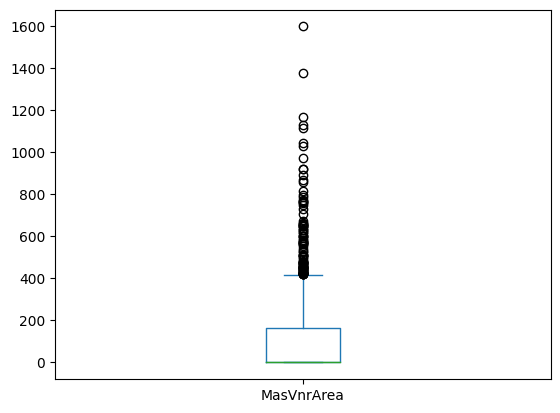

In [73]:
data['MasVnrArea'].plot.box()

In [76]:
data['MasVnrArea'].fillna(0, inplace=True)

In [77]:
data['MasVnrArea'].isna().sum()

0

In [78]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [79]:
data['BsmtQual'].value_counts()

,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


In [80]:
data['BsmtQual'].mode()

,BsmtQual
0,TA


In [83]:
#data['BsmtQual'].fillna(method='ffill', inplace=True)

<ipython-input-83-9ad2e4d27869>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['BsmtQual'].fillna(method='ffill', inplace=True)


In [85]:
data['BsmtQual'].fillna(data['BsmtQual'].ffill(), inplace=True)

In [86]:
data['BsmtQual'].isna().sum()

0

In [87]:
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [88]:
data['BsmtCond'].isna().sum()

37

In [89]:
data['BsmtCond'].describe()

,BsmtCond
count,1423
unique,4
top,TA
freq,1311


In [91]:
data['BsmtCond'].fillna(data['BsmtCond'].ffill(), inplace=True)
data['BsmtCond'].isna().sum()

0

In [95]:
data['YearBuilt'].describe()

,YearBuilt
count,1460.000000
mean,1971.267808
std,30.202904
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2000.000000
max,2010.000000


In [102]:
data['YearBuilt'].isna().sum()

0

In [96]:
q2 = data['YearBuilt'].median() #1973.0
moyen = data['YearBuilt'].mean() # 1971.26

1971.267808219178

In [106]:
minYear = data['YearBuilt'].min()
maxYear = data['YearBuilt'].max()
q1 = data['YearBuilt'].quantile(0.25)
q2 = data['YearBuilt'].median() #1973.0
q3 = data['YearBuilt'].quantile(0.75)


In [109]:
def Build (year):
    if minYear <= year < q1:
        return "Po"
    elif q1 <= year < q2:
        return "FA"
    elif q2 <= year < q3:
        return "TA"
    elif q3 <= year <= maxYear:
        return "Gd"
    else:
        return "Valeur NAN"

In [112]:
for i in data['YearBuilt'] :
  print(Build(i))


Gd
TA
Gd
Po
Gd
TA
Gd
TA
Po
Po
FA
Gd
FA
Gd
FA
Po
FA
FA
Gd
FA
Gd
Po
Gd
TA
FA
Gd
Po
Gd
FA
Po
Po
FA
Gd
FA
Gd
Gd
TA
FA
Po
FA
FA
FA
TA
TA
FA
Gd
Gd
Gd
Po
FA
TA
Po
FA
TA
FA
FA
TA
Gd
Gd
FA
Gd
Po
Gd
Po
TA
Gd
FA
Gd
Po
Po
TA
TA
TA
FA
Po
TA
FA
Po
FA
Po
FA
TA
Gd
FA
TA
TA
Gd
Gd
Po
TA
Po
FA
Po
Po
TA
TA
TA
FA
Po
FA
TA
TA
TA
Gd
Po
Gd
Po
Po
Po
TA
FA
Gd
Gd
Po
Po
TA
FA
Gd
TA
Gd
FA
Po
FA
TA
TA
Po
TA
Po
FA
FA
FA
Gd
FA
Gd
FA
FA
FA
TA
TA
TA
FA
Gd
Po
TA
FA
Gd
Po
Gd
Gd
Po
TA
Gd
FA
FA
Po
Po
Po
Gd
Gd
Gd
TA
Gd
Gd
FA
Po
Po
FA
Gd
Gd
TA
Po
FA
TA
FA
TA
Po
TA
FA
Gd
Po
Gd
Po
FA
Gd
Po
Po
TA
Po
TA
Gd
Po
FA
TA
Gd
FA
TA
Gd
Po
Po
Gd
Gd
TA
Po
Gd
Po
TA
FA
FA
TA
FA
Po
Gd
Gd
TA
TA
FA
Gd
Po
Po
Gd
Gd
Gd
TA
FA
Gd
FA
TA
FA
FA
Gd
FA
TA
FA
TA
Gd
FA
Gd
TA
Gd
Po
Gd
Po
Po
TA
TA
TA
Po
FA
Gd
FA
Po
Gd
Gd
FA
FA
TA
Gd
Gd
Gd
FA
FA
Gd
TA
Po
Po
TA
TA
Po
Po
TA
Gd
FA
TA
FA
TA
Po
Gd
Po
Gd
TA
TA
Gd
Gd
Gd
TA
Gd
FA
FA
FA
Po
Gd
Po
Po
TA
Po
TA
Po
TA
FA
Po
Po
TA
Gd
FA
Po
Gd
TA
Po
Po
Gd
TA
Po
Po
FA
Po
Gd
TA
Gd
TA
TA
Gd
Gd
TA
FA
FA
Po
TA
FA
Po
Po
FA
FA
Gd
G